# Step 2: Create visual (optional)

In [1]:
#import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import contextily as ctx

In [2]:
# import census block group shape file
reg_data = "Output/statewide_reg_analysis.csv"
reg_data_import = pd.read_csv(reg_data, encoding = "ISO-8859-1", dtype={'LD': object})
bgs = geopandas.read_file("Resources/tl_2018_04_sldl.shp")
reg_data_import.head()

,LD,CVAP_estimate,reg_count,reg_potential,percent_reg
0,007,142200,34361,107839,0.241639
1,008,154105,83464,70641,0.541605
2,026,152105,82219,69886,0.540541
3,016,180570,111801,68769,0.619156
4,005,175075,107660,67415,0.614936


In [3]:
bgs.head()

,STATEFP,SLDLST,GEOID,NAMELSAD,LSAD,LSY,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,027,04027,State House District 27,LL,2018,G5220,N,655800560,1259367,+33.3239731,-112.1099006,"POLYGON ((-112.308673 33.38103, -112.307813 33..."
1,04,017,04017,State House District 17,LL,2018,G5220,N,173470638,653263,+33.2740760,-111.8296065,"POLYGON ((-111.893596 33.291148, -111.892619 3..."
2,04,006,04006,State House District 6,LL,2018,G5220,N,26365941168,109675380,+34.8085430,-111.3098019,"POLYGON ((-112.754049 35.352699, -112.75394 35..."
3,04,020,04020,State House District 20,LL,2018,G5220,N,112420095,289648,+33.6159325,-112.1269982,"POLYGON ((-112.218569 33.631082, -112.218343 3..."
4,04,026,04026,State House District 26,LL,2018,G5220,N,312199781,7985784,+33.4842803,-111.8269641,"POLYGON ((-111.995553 33.383015, -111.995553 3..."


In [7]:
#merged_data = pd.merge(reg_data_import, maricopa_bgs, left_on='block_group', right_on='GEOID')
merged_data = bgs.set_index('SLDLST').join(reg_data_import.set_index('LD'))
merged_data = merged_data.dropna(how='any')
#merged_data = merged_data[["CVAP_estimate", "CVAP_margin_of_error", "reg_count", "percent_reg", "geometry"]]

In [8]:
def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

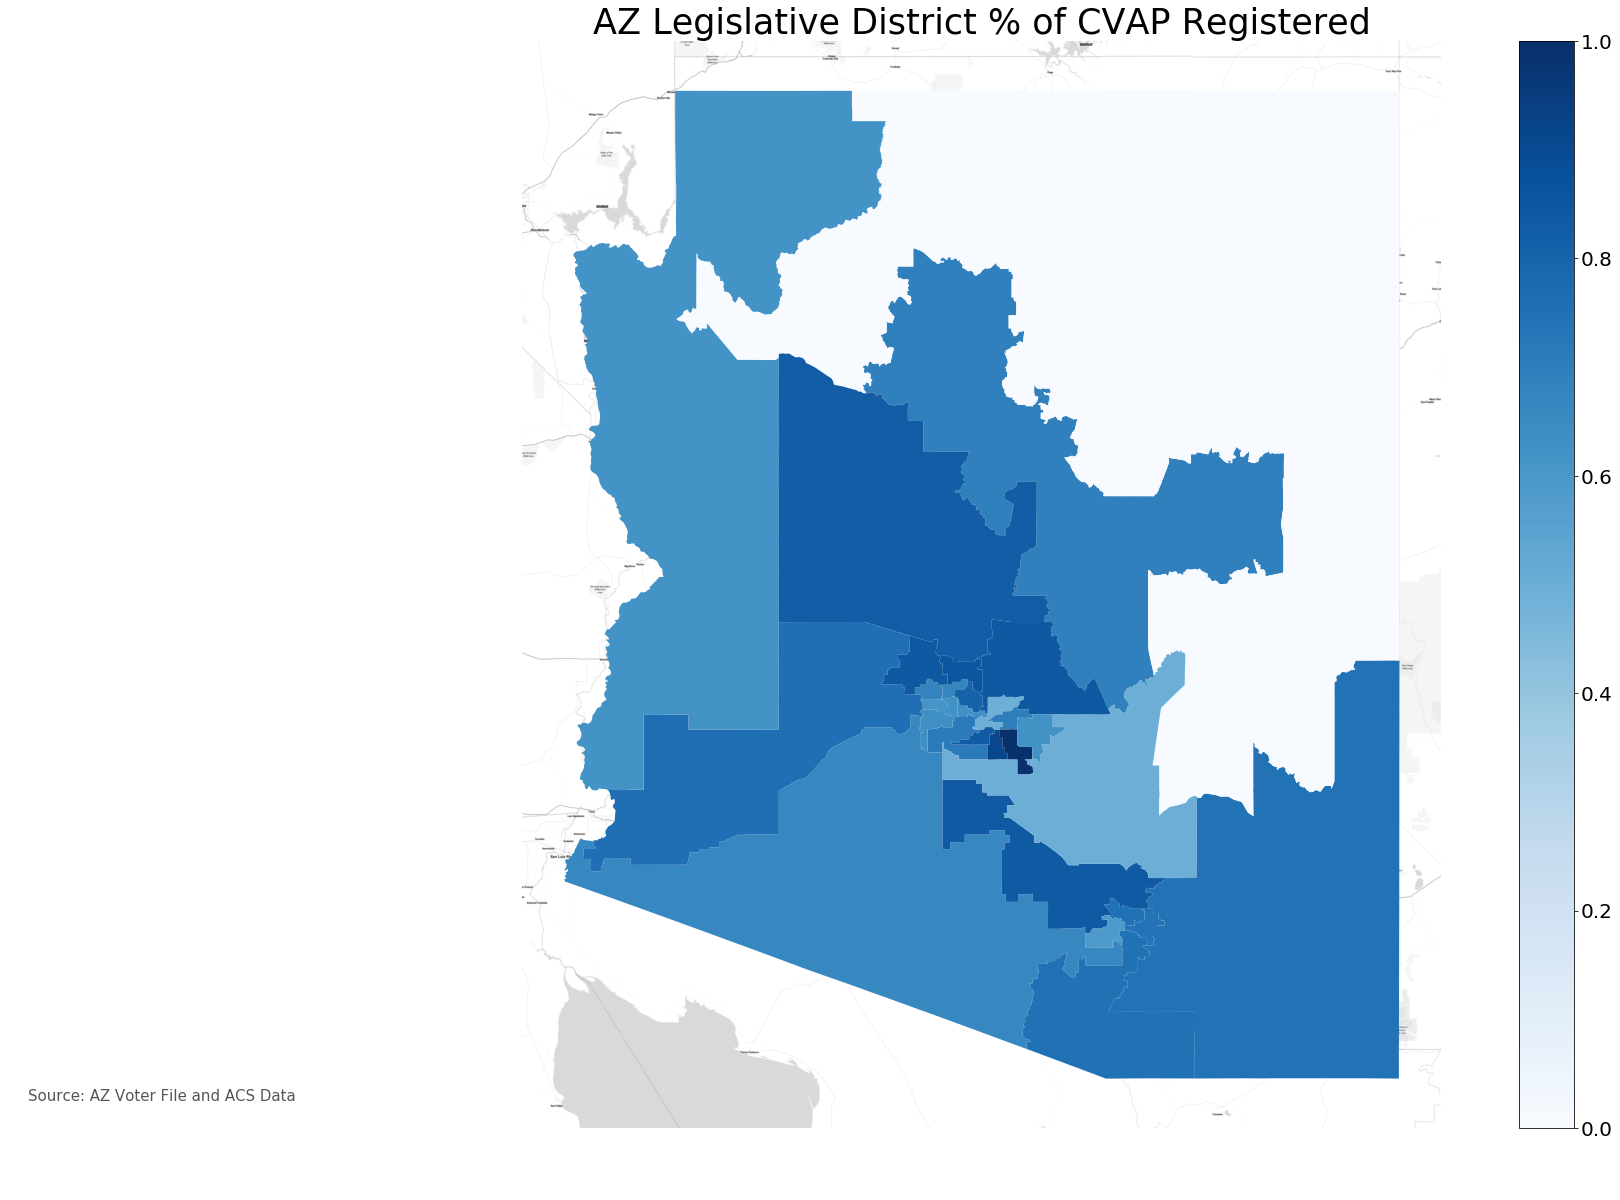

In [15]:
variable = 'percent_reg'

# set the range for the choropleth
vmin, vmax = 0, 1

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(28, 20))

# create map
merged_data = merged_data.to_crs(epsg=3395)
merged_data.plot(variable, cmap='Blues', linewidth=0.8, ax=ax)

add_basemap(ax, zoom=10, url=ctx.sources.ST_TONER_LITE)

#ax.set_ylim([3920000, 3930000])
#ax.set_xlim([-1.248, -1.242])

# add a title
ax.set_title('AZ Legislative District % of CVAP Registered', \
              fontdict={'fontsize': '35',
                        'fontweight' : '5'})

# create an annotation for the  data source
ax.annotate('Source: AZ Voter File and ACS Data',
           xy=(0.1, .08), xycoords='figure fraction',
           horizontalalignment='center', verticalalignment='bottom',
           fontsize=15, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

# remove the axis
ax.axis('off')

# this will save the figure as a high-res png. you can also save as svg
fig.savefig("Images/statewide.png", dpi=550)